# Simple Linear Regression

In [111]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1/ Dataset

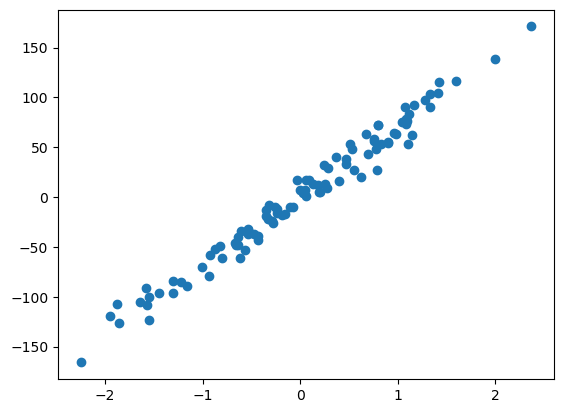

In [112]:
m, n = 100, 1
x, y = make_regression(n_samples=m, n_features=n, noise=10)
plt.scatter(x, y)

In [113]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [114]:
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)


In [115]:
# X matrix
X = np.hstack((x, np.ones(x.shape)))
print(X)

[[ 0.36940058  1.        ]
 [-2.25033556  1.        ]
 [-1.87893092  1.        ]
 [-0.53301125  1.        ]
 [-1.1557466   1.        ]
 [ 1.0449494   1.        ]
 [ 1.32929503  1.        ]
 [ 0.75572596  1.        ]
 [-1.00765895  1.        ]
 [ 0.78731536  1.        ]
 [ 0.20493318  1.        ]
 [-1.86103137  1.        ]
 [ 0.61988595  1.        ]
 [ 0.67042703  1.        ]
 [-1.30623457  1.        ]
 [-0.869994    1.        ]
 [-1.2225492   1.        ]
 [-0.43176825  1.        ]
 [ 0.24040419  1.        ]
 [-0.81812182  1.        ]
 [-0.66463099  1.        ]
 [-0.56480686  1.        ]
 [ 0.08577902  1.        ]
 [ 1.14934503  1.        ]
 [-1.30123803  1.        ]
 [ 0.05619567  1.        ]
 [-0.29375721  1.        ]
 [ 0.79324     1.        ]
 [ 0.95869309  1.        ]
 [ 0.04463447  1.        ]
 [-0.43472912  1.        ]
 [ 0.02389434  1.        ]
 [-0.63533075  1.        ]
 [ 0.79298503  1.        ]
 [ 1.16978354  1.        ]
 [ 1.27532919  1.        ]
 [ 0.51349573  1.        ]
 

In [116]:
theta = np.random.randn(2, 1)
print(theta.shape)
print(theta)

(2, 1)
[[0.12991889]
 [2.95683424]]


## Model

In [117]:
def model(X, theta):
    return X.dot(theta)

In [118]:
Y = model(X, theta)
print(Y)

[[3.00482635]
 [2.66447315]
 [2.71272562]
 [2.88758601]
 [2.80668093]
 [3.0925929 ]
 [3.12953477]
 [3.05501732]
 [2.82592031]
 [3.05912138]
 [2.98345893]
 [2.71505111]
 [3.03736913]
 [3.04393537]
 [2.7871297 ]
 [2.84380559]
 [2.79800201]
 [2.90073939]
 [2.98806728]
 [2.85054476]
 [2.87048612]
 [2.88345516]
 [2.96797855]
 [3.10615587]
 [2.78777884]
 [2.96413512]
 [2.91866963]
 [3.0598911 ]
 [3.08138658]
 [2.9626331 ]
 [2.90035471]
 [2.95993856]
 [2.87429277]
 [3.05985797]
 [3.10881122]
 [3.12252359]
 [3.02354703]
 [3.05440957]
 [3.07341448]
 [2.91336776]
 [2.76885867]
 [2.91154343]
 [2.93277739]
 [3.14161169]
 [3.07425532]
 [3.09723329]
 [2.96426651]
 [2.95246836]
 [2.92578238]
 [3.02602573]
 [2.87193767]
 [3.09653207]
 [2.98046588]
 [3.01764526]
 [2.75266687]
 [3.10206719]
 [2.89491882]
 [2.9112046 ]
 [2.91491472]
 [2.7039829 ]
 [3.02903118]
 [2.75108985]
 [2.99008674]
 [3.21636977]
 [3.09987113]
 [2.98165482]
 [2.75595343]
 [2.75510943]
 [2.83541309]
 [3.1401357 ]
 [2.97366291]
 [2.87

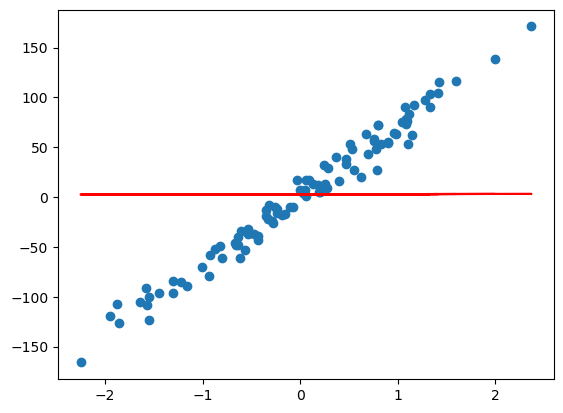

In [119]:
plt.scatter(x, y)
plt.plot(x, Y, c='red')

In [120]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)-y)**2)

In [121]:
cost_function(X, y, theta)

2211.7926577123635

In [122]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [123]:
def gradient_descent(X, y, theta, learn_rate, n_iter):
    cost_history = np.zeros(n_iter)
    for i in range(0, n_iter):
        theta = theta - learn_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    
    return theta, cost_history

In [124]:
n_iter = 1000
theta_final, cost_history = gradient_descent(X, y, theta, learn_rate=0.01, n_iter=n_iter)
print(theta_final)

[[69.31953611]
 [ 1.28646305]]


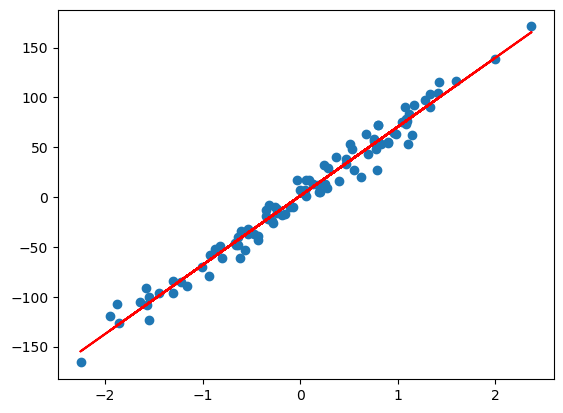

In [125]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='red')

## Courbe d'apprentissage

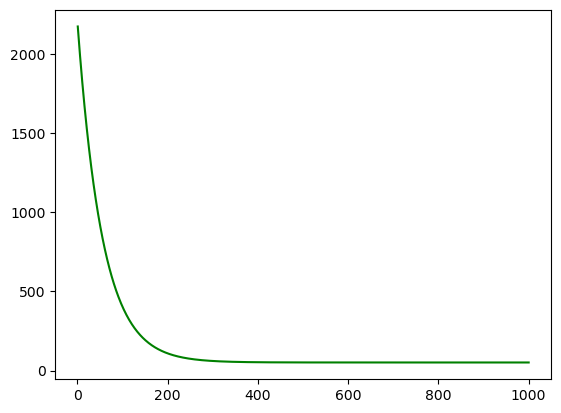

In [126]:
plt.plot(np.arange(1, n_iter+1), cost_history, c='green')

## Coefficient de détermination

In [127]:
def determ_coef(y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

r = determ_coef(y, predictions)
print(r)

0.9771204247392105
